# Dimension Reduction - Iris Dataset
## PCA
Tutorial https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
# PCA from 4D to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())

   principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767


In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


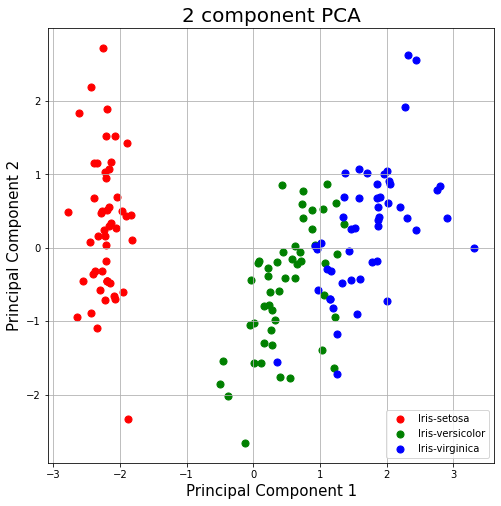

In [5]:
# Plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [6]:
# Variance calculation
pca.explained_variance_ratio_
# [First PC, Second PC]
# Together, the two components contain 95.80% of the information.

array([0.72770452, 0.23030523])

In [7]:
## YOUR CODE STARTS HERE
# PCA from 4D to 1D
pca1 = PCA(n_components=1)
principalComponents1 = pca1.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1'])
print(principalDf.head())

   principal component 1
0              -2.264542
1              -2.086426
2              -2.367950
3              -2.304197
4              -2.388777


In [8]:
# Concatenate to original dataset
finalDf1 = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf1.head())

   principal component 1       target
0              -2.264542  Iris-setosa
1              -2.086426  Iris-setosa
2              -2.367950  Iris-setosa
3              -2.304197  Iris-setosa
4              -2.388777  Iris-setosa


In [9]:
# Plot 1D cannot be done with this dataset because the target is not numerical
# Variance calculation
pca1.explained_variance_ratio_

array([0.72770452])

In [10]:
# PCA, MDS, ISOMAP Tutorial https://www.kaggle.com/kadek750/basics-of-iris-categorisation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','Species'])
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

X = np.array(iris[[c for c in iris.columns if c != "Species"]])
Y_iris = iris["Species"]
color = LabelEncoder().fit_transform(Y_iris)

Axes3D

n_components=2
n_neighbors=5

color = LabelEncoder().fit_transform(Y_iris)

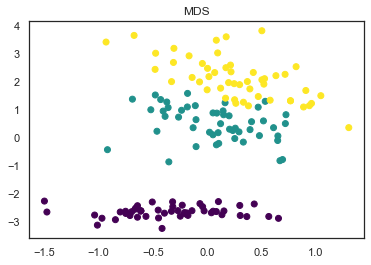

In [12]:
#----MDS---------- sklearn implementation (Stress minimization-majorization algorithm SMACOF)

mds = manifold.MDS(n_components, max_iter=1000, n_init=1)
Y = mds.fit_transform(X)

plt.title("MDS")

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.viridis)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=5, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


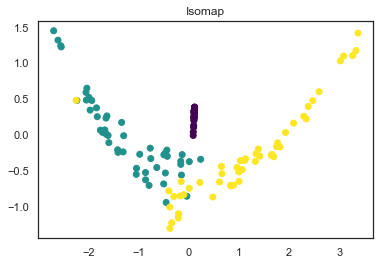

In [13]:
#----Isomap---------- sklearn implementation (with kernel PCA)

Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)

plt.title("Isomap")

plt.scatter(Y[:, 0], Y[:, 1] , c=color, cmap=plt.cm.viridis)

In [14]:
# Interesting tutorial https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html